In [8]:
import pandas as pd
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import matplotlib.pyplot as plt

#Disable GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [41]:
df = pd.read_csv("data/data.csv",index_col = "date")
df.index = pd.to_datetime(df.index, format="%d/%m/%Y")

In [42]:
def customGenerator(data, X_size, y_size):
    # data = np.reshape(data,  (len(data),1) )
    X = list()
    y = list()
    for i in range(len(data)):
        n = i + X_size
        m = n + y_size
        
        if m <= len(data):
            x_input = data[i:n]
            # x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[n:m])

    #Reshape X and y to mathc specification
    X  = np.reshape(X, (len(X), 1, X_size))
    y = np.reshape(y, (len(y), 1, y_size))
    return array(X), array(y)
data = np.reshape(df.Cumulative_solar_power.values, (-1, 1))
X, y = customGenerator(data, 4,1)

In [43]:
X = X.reshape((3300,4,1))
h_size = 100
holdout_X = X[-h_size:]
X = X[:-h_size]
holdout_y= y[-h_size:]
y = y[:-h_size]

In [44]:
model = Sequential()
model.add(Conv1D(filters=4, kernel_size=2, activation='relu', input_shape=(4, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [45]:
history = model.fit(X, y, epochs=100, verbose=0, validation_split=0.2)

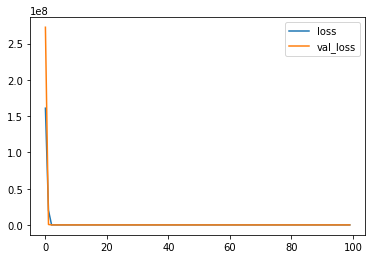

In [46]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label ="val_loss")
plt.legend()

In [47]:
results = list()
for x in holdout_X:
    results.append(model.predict(x.reshape(1,4,1)))
results

[array([[35411.586]], dtype=float32),
 array([[35432.25]], dtype=float32),
 array([[35455.645]], dtype=float32),
 array([[35463.33]], dtype=float32),
 array([[35488.67]], dtype=float32),
 array([[35515.234]], dtype=float32),
 array([[35540.09]], dtype=float32),
 array([[35559.223]], dtype=float32),
 array([[35582.785]], dtype=float32),
 array([[35605.81]], dtype=float32),
 array([[35627.66]], dtype=float32),
 array([[35647.324]], dtype=float32),
 array([[35668.527]], dtype=float32),
 array([[35681.293]], dtype=float32),
 array([[35698.848]], dtype=float32),
 array([[35707.61]], dtype=float32),
 array([[35719.984]], dtype=float32),
 array([[35739.08]], dtype=float32),
 array([[35755.918]], dtype=float32),
 array([[35768.22]], dtype=float32),
 array([[35783.586]], dtype=float32),
 array([[35805.69]], dtype=float32),
 array([[35818.453]], dtype=float32),
 array([[35831.285]], dtype=float32),
 array([[35849.02]], dtype=float32),
 array([[35856.594]], dtype=float32),
 array([[35864.434]], d

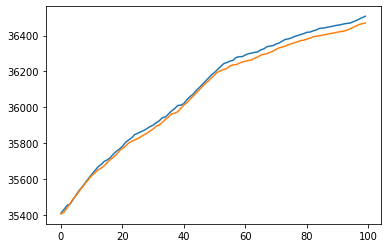

In [54]:
plt.plot(np.asarray(results).flatten())
plt.plot(df.Cumulative_solar_power.values[-h_size:])